In [44]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
#import sklearn as skl
#from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
#from sklearn import metrics


In [45]:
df = pd.read_csv('DF/FMnist/fashion-mnist_train.csv', dtype=int) # read train data

In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60000 entries, 0 to 59999
Columns: 785 entries, label to pixel784
dtypes: int64(785)
memory usage: 359.3 MB


In [47]:
x = df.drop("label",axis = 1)
y = df.label

In [48]:
def random_forest(x_train, x_test, y_train, y_test):
    from sklearn.ensemble import RandomForestClassifier
    from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

    #fit
    model = RandomForestClassifier(n_estimators=500, max_leaf_nodes=16, n_jobs=-1)
    model.fit(x_train, y_train)

    #test
    predict = model.predict(x_test)
    print(classification_report(y_test, predict))
    print(confusion_matrix(y_test, predict))
    print('Accuracy: %.3f' % accuracy_score(y_test, predict))

In [49]:
def svm(x_train, x_test, y_train, y_test):
    from sklearn.linear_model import SGDClassifier
    from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

    # Instantiate SVM classifier using SGDClassifier
    svm = SGDClassifier(loss='hinge')

    #fit
    svm.fit(x_train, y_train)

    #test
    predict = svm.predict(x_test)
    print(confusion_matrix(y_test, predict))
    print(classification_report(y_test, predict))
    print('Accuracy: %.3f' % accuracy_score(y_test, predict))

In [50]:
def svmCV(X, y):
    from sklearn.linear_model import SGDClassifier
    from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
    from sklearn.model_selection import KFold

    kf = KFold(n_splits=5,shuffle=False)
    kf.split(X)
    svm = SGDClassifier(loss='hinge')
    # Initialize the accuracy of the models to blank list. The accuracy of each model will be appended to this list
    accuracy_model = []

    # Iterate over each train-test split
    for train_index, test_index in kf.split(X):
        # Split train-test
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y[train_index], y[test_index]
        # Train the model
        svm.fit(x_train, y_train)
        # Append to accuracy_model the accuracy of the model
        accuracy_model.append(accuracy_score(y_test, svm.predict(X_test), normalize=True)*100)

    # Print the accuracy
    print(accuracy_model)

In [51]:
def naive(x_train, x_test, y_train, y_test):
    from sklearn.naive_bayes import GaussianNB
    from sklearn.metrics import classification_report, confusion_matrix, accuracy_score


    #fit
    model = GaussianNB()
    model.fit(x_train, y_train)

    #test
    predict = model.predict(x_test)
    con_mat = confusion_matrix(y_test, predict)
    sns.heatmap(con_mat, annot=True)
    print(con_mat)
    print(classification_report(y_test, predict))
    print('Accuracy: %.3f' % accuracy_score(y_test, predict))


In [52]:
def log_reg(x_train, x_test, y_train, y_test):
    from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
    from sklearn.linear_model import LogisticRegression


    #fit
    #model = LogisticRegression(max_iter=70000)
    model = LogisticRegression()
    model.fit(x_train, y_train)

    #test
    predict = model.predict(x_test)
    con_mat = confusion_matrix(y_test, predict)
    sns.heatmap(con_mat, annot=True)
    print(classification_report(y_test, predict))
    print('Accuracy: %.3f' % accuracy_score(y_test, predict))

In [53]:
def decision_tree(x_train, x_test, y_train, y_test):
    from sklearn.tree import DecisionTreeClassifier
    from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

    #fit
    classifier = DecisionTreeClassifier()
    classifier.fit(x_train, y_train)

    #test
    predict = classifier.predict(x_test)
    print(confusion_matrix(y_test, predict))
    print(classification_report(y_test, predict))
    print('Accuracy: %.3f' % accuracy_score(y_test, predict))

In [54]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=0)


In [55]:
from sklearn.decomposition import PCA

#fit
pca= PCA(n_components=0.95)
x_pca_train = pca.fit_transform(x_train)
x_pca_test = pca.transform(x_test)

In [56]:
#without pca
random_forest(x_train, x_test, y_train, y_test)

              precision    recall  f1-score   support

           0       0.73      0.79      0.76      1189
           1       0.97      0.87      0.92      1189
           2       0.59      0.71      0.65      1204
           3       0.66      0.90      0.76      1260
           4       0.53      0.73      0.61      1208
           5       0.95      0.85      0.90      1188
           6       0.75      0.01      0.02      1195
           7       0.86      0.89      0.87      1160
           8       0.89      0.91      0.90      1210
           9       0.87      0.93      0.90      1197

    accuracy                           0.76     12000
   macro avg       0.78      0.76      0.73     12000
weighted avg       0.78      0.76      0.73     12000

[[ 939   10   51  153    3    1    2    0   30    0]
 [   0 1033   29  122    2    2    0    0    1    0]
 [  11    0  860   16  292    1    1    0   23    0]
 [  38    8   48 1131   28    0    1    0    6    0]
 [   2    5  152  149  887   

In [57]:
#with pca
random_forest(x_pca_train, x_pca_test, y_train, y_test)

              precision    recall  f1-score   support

           0       0.66      0.80      0.72      1189
           1       0.98      0.91      0.94      1189
           2       0.66      0.69      0.68      1204
           3       0.77      0.83      0.80      1260
           4       0.64      0.69      0.67      1208
           5       0.73      0.80      0.76      1188
           6       0.63      0.27      0.38      1195
           7       0.82      0.83      0.83      1160
           8       0.83      0.91      0.87      1210
           9       0.87      0.88      0.88      1197

    accuracy                           0.76     12000
   macro avg       0.76      0.76      0.75     12000
weighted avg       0.76      0.76      0.75     12000

[[ 948    6   15  120    9   27   20    0   38    6]
 [  14 1086   25   50    7    6    1    0    0    0]
 [  50    1  831    9  180   22   64    0   46    1]
 [  66   17    6 1052   65   10   33    0    7    4]
 [   9    1  191   59  837   

[[ 729   50   37  229   87    1   25    0   31    0]
 [   2 1117   12   43    3    0   11    0    1    0]
 [   2   10  409   87  651    0   15    0   30    0]
 [   5  427    6  772   40    0    8    0    2    0]
 [   1   42   55  206  890    0    3    0   11    0]
 [   0    2    2    3    0  331    5  806    7   32]
 [ 138   36  156  261  505    0   42    0   57    0]
 [   0    0    0    0    0    8    0 1126    4   22]
 [   3    2   20  111  168   10   22    2  870    2]
 [   0    0    3    1    1   33    4  337    5  813]]
              precision    recall  f1-score   support

           0       0.83      0.61      0.70      1189
           1       0.66      0.94      0.78      1189
           2       0.58      0.34      0.43      1204
           3       0.45      0.61      0.52      1260
           4       0.38      0.74      0.50      1208
           5       0.86      0.28      0.42      1188
           6       0.31      0.04      0.06      1195
           7       0.50      0.97   

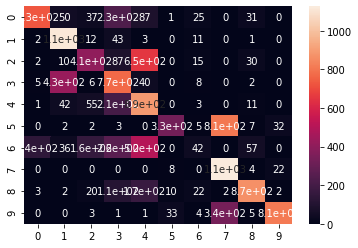

In [58]:
#without pca
naive(x_train, x_test, y_train, y_test)

[[ 866    4   18   63    4    8   74    0  152    0]
 [   8 1056   12   57    1    4   13    0   38    0]
 [  26    0  801    6  155   19  106    0   91    0]
 [  64   68   10  939   41   24   42    0   72    0]
 [   8    3  114   59  804    4  128    0   88    0]
 [  11    0   10    1    0  881   42  200   34    9]
 [ 197    7  125   39   90   23  539    0  175    0]
 [   0    0    0    0    0  109    0  982    6   63]
 [  26    0   22   11   28   28   44   36 1013    2]
 [   0    0    1    0    0   39   10  102   37 1008]]
              precision    recall  f1-score   support

           0       0.72      0.73      0.72      1189
           1       0.93      0.89      0.91      1189
           2       0.72      0.67      0.69      1204
           3       0.80      0.75      0.77      1260
           4       0.72      0.67      0.69      1208
           5       0.77      0.74      0.76      1188
           6       0.54      0.45      0.49      1195
           7       0.74      0.85   

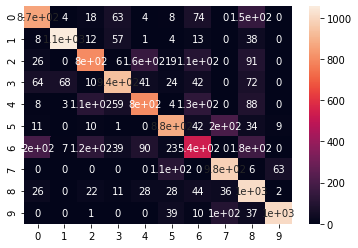

In [59]:
#with pca
naive(x_pca_train, x_pca_test, y_train, y_test)

/home/pequeno/pythonProject/Project/pythonProject1/lib64/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


              precision    recall  f1-score   support

           0       0.80      0.82      0.81      1189
           1       0.97      0.97      0.97      1189
           2       0.74      0.78      0.76      1204
           3       0.86      0.87      0.86      1260
           4       0.73      0.78      0.75      1208
           5       0.94      0.90      0.92      1188
           6       0.66      0.55      0.60      1195
           7       0.91      0.93      0.92      1160
           8       0.93      0.94      0.93      1210
           9       0.93      0.94      0.93      1197

    accuracy                           0.85     12000
   macro avg       0.85      0.85      0.85     12000
weighted avg       0.85      0.85      0.85     12000

Accuracy: 0.847


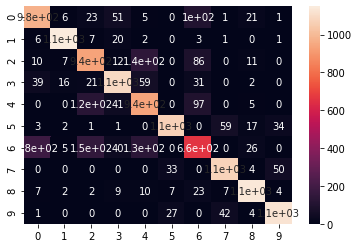

In [60]:
#without pca
log_reg(x_train, x_test, y_train, y_test)

/home/pequeno/pythonProject/Project/pythonProject1/lib64/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


              precision    recall  f1-score   support

           0       0.79      0.83      0.81      1189
           1       0.98      0.97      0.97      1189
           2       0.74      0.77      0.75      1204
           3       0.87      0.87      0.87      1260
           4       0.76      0.77      0.76      1208
           5       0.93      0.94      0.94      1188
           6       0.64      0.58      0.61      1195
           7       0.91      0.91      0.91      1160
           8       0.95      0.94      0.94      1210
           9       0.94      0.95      0.94      1197

    accuracy                           0.85     12000
   macro avg       0.85      0.85      0.85     12000
weighted avg       0.85      0.85      0.85     12000

Accuracy: 0.852


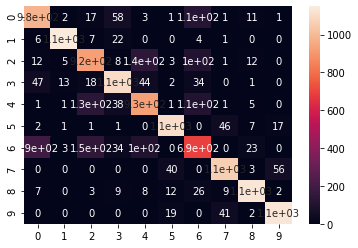

In [61]:
#with pca
log_reg(x_pca_train, x_pca_test, y_train, y_test)

In [62]:
#without pca
svm(x_train, x_test, y_train, y_test)

[[ 957    2    5  163    5    0   38    0   19    0]
 [  16 1061    2  100    4    0    6    0    0    0]
 [  95    2  577   81  231    0  210    0    8    0]
 [  30    3    1 1212    5    0    6    1    1    1]
 [  11    0   27  253  773    0  138    0    6    0]
 [   4    2    1    2    0 1085    4   31   29   30]
 [ 233    3   45  191   91    0  603    0   29    0]
 [   1    0    1    0    0  141    2  928    6   81]
 [  20    1    3   35    4    9   22    3 1111    2]
 [   0    0    0    1    1   44    0   15    3 1133]]
              precision    recall  f1-score   support

           0       0.70      0.80      0.75      1189
           1       0.99      0.89      0.94      1189
           2       0.87      0.48      0.62      1204
           3       0.59      0.96      0.73      1260
           4       0.69      0.64      0.67      1208
           5       0.85      0.91      0.88      1188
           6       0.59      0.50      0.54      1195
           7       0.95      0.80   

In [63]:
svmCV(x, y)

[12.208333333333334, 13.116666666666665, 10.225, 8.291666666666666, 14.383333333333335]


In [64]:
#with pca
svm(x_pca_train, x_pca_test, y_train, y_test)

[[ 756    1   59  134   14    2  186    7   29    1]
 [   3 1137   13   25    3    0    5    3    0    0]
 [   5    2 1013   27   76    3   52    3   23    0]
 [  37   11   21 1112   45    0   30    4    0    0]
 [   1    0  396  123  569    1   96    3   18    1]
 [   4    2    2    1    2 1100    2   56   13    6]
 [  85    3  261  102   73    1  615    1   53    1]
 [   0    0    0    0    0   44    0 1079    4   33]
 [  23    2    7   23   12   11   15   12 1104    1]
 [   0    1    0    0    0   69    1   48    1 1077]]
              precision    recall  f1-score   support

           0       0.83      0.64      0.72      1189
           1       0.98      0.96      0.97      1189
           2       0.57      0.84      0.68      1204
           3       0.72      0.88      0.79      1260
           4       0.72      0.47      0.57      1208
           5       0.89      0.93      0.91      1188
           6       0.61      0.51      0.56      1195
           7       0.89      0.93   

In [65]:
#without pca
decision_tree(x_train, x_test, y_train, y_test)

[[ 893    6   33   60    6    2  170    1   17    1]
 [   8 1122    8   32    6    0    8    0    5    0]
 [  23    2  831   14  166    2  158    0    8    0]
 [  65   40   20 1005   72    2   46    0    9    1]
 [  11    4  181   65  799    1  137    0    9    1]
 [   0    3    0    0    1 1069    3   66   12   34]
 [ 188    8  166   38  138    3  629    1   24    0]
 [   0    0    0    0    0   64    0 1004    4   88]
 [  11    2   14   16   18   14   28    9 1093    5]
 [   0    1    2    0    1   32    2   70    4 1085]]
              precision    recall  f1-score   support

           0       0.74      0.75      0.75      1189
           1       0.94      0.94      0.94      1189
           2       0.66      0.69      0.68      1204
           3       0.82      0.80      0.81      1260
           4       0.66      0.66      0.66      1208
           5       0.90      0.90      0.90      1188
           6       0.53      0.53      0.53      1195
           7       0.87      0.87   

In [66]:
#with pca
decision_tree(x_train, x_test, y_train, y_test)

[[ 900    8   26   69   11    3  160    1   11    0]
 [   7 1125    4   34    6    1   10    0    2    0]
 [  21    1  833   11  166    0  161    0   11    0]
 [  62   41   20 1002   66    0   55    0   13    1]
 [  11    5  187   61  804    1  127    0   11    1]
 [   0    1    0    1    2 1063    3   69   14   35]
 [ 187   10  161   46  132    2  627    0   29    1]
 [   0    0    0    0    0   67    0 1012    3   78]
 [  15    1   14   12   16   15   26   11 1094    6]
 [   0    0    2    0    1   33    3   70    3 1085]]
              precision    recall  f1-score   support

           0       0.75      0.76      0.75      1189
           1       0.94      0.95      0.94      1189
           2       0.67      0.69      0.68      1204
           3       0.81      0.80      0.80      1260
           4       0.67      0.67      0.67      1208
           5       0.90      0.89      0.90      1188
           6       0.53      0.52      0.53      1195
           7       0.87      0.87   